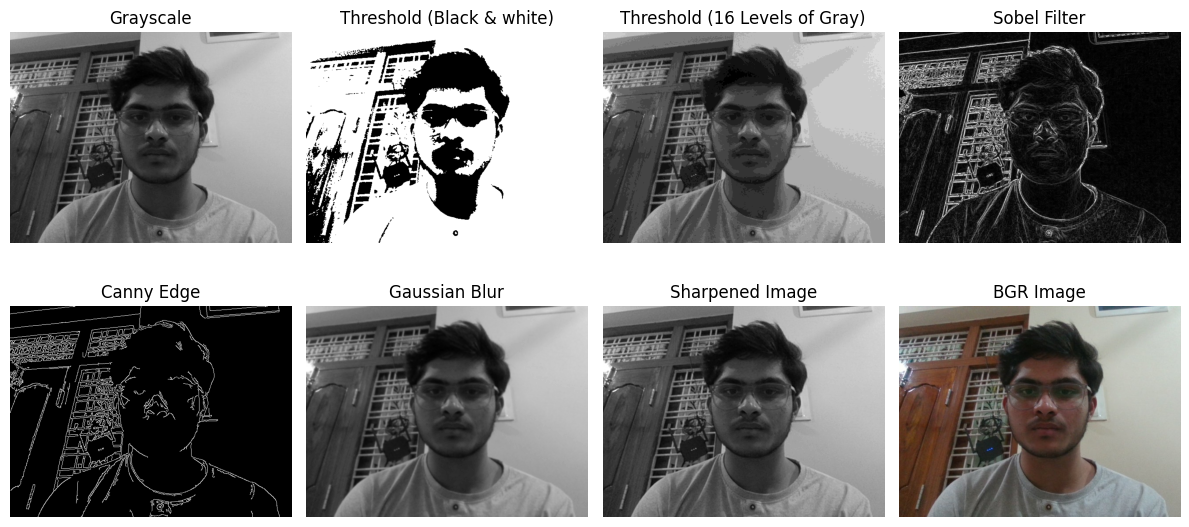

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to capture an image from the camera
def capture_image(camera_index=0, save_path='captured_image.jpg'):
    cap = cv2.VideoCapture(camera_index)

    if not cap.isOpened():
        print("Error: Could not open the camera.")
        return None

    ret, frame = cap.read()
    if not ret:
        print("Error: Could not capture image.")
        return None

    cv2.imwrite(save_path, frame)
    cap.release()
    cv2.destroyAllWindows()
    return frame

# Function to convert to grayscale
def grayscale_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

# Binary Thresholding (Black & White)
def binary_threshold(image, threshold_value=60):
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_image

# 16 Levels of Gray
def gray_16_levels(image):
    # Divide the range of 0-255 into 16 levels
    levels = np.floor(image / 16) * 16
    return levels.astype('uint8')

# Sobel Filter
def sobel_filter(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Combine the gradients
    return np.uint8(sobel_combined)

# Canny Edge Detector
def canny_edge_detector(image, low_threshold=50, high_threshold=150):
    edges = cv2.Canny(image, low_threshold, high_threshold)
    return edges

# Gaussian Blur
def gaussian_blur(image, kernel_size=5):
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return blurred_image

# Sharpen Image
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

# Convert RGB to BGR
def rgb_to_bgr(image):
    bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return bgr_image

# Apply filters to the captured image
def apply_filters(image):
    gray_img = grayscale_image(image)
    binary_img = binary_threshold(gray_img)
    gray_16_img = gray_16_levels(gray_img)
    sobel_img = sobel_filter(gray_img)
    canny_img = canny_edge_detector(gray_img)
    blurred_img = gaussian_blur(gray_img)
    sharpened_img = sharpen_image(blurred_img)
    bgr_img = rgb_to_bgr(image)

    # Display all processed images
    plt.figure(figsize=(12, 6))

    # Grayscale
    plt.subplot(2, 4, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    # Binary Threshold
    plt.subplot(2, 4, 2)
    plt.imshow(binary_img, cmap='gray')
    plt.title('Threshold (Black & white)')
    plt.axis('off')

    # 16 Shades of Gray
    plt.subplot(2, 4, 3)
    plt.imshow(gray_16_img, cmap='gray')
    plt.title('Threshold (16 Levels of Gray)')
    plt.axis('off')

    # Sobel Filter
    plt.subplot(2, 4, 4)
    plt.imshow(sobel_img, cmap='gray')
    plt.title('Sobel Filter')
    plt.axis('off')

    # Canny Edge Detector
    plt.subplot(2, 4, 5)
    plt.imshow(canny_img, cmap='gray')
    plt.title('Canny Edge')
    plt.axis('off')

    # Gaussian Blur
    plt.subplot(2, 4, 6)
    plt.imshow(blurred_img, cmap='gray')
    plt.title('Gaussian Blur')
    plt.axis('off')

    # Sharpened Image
    plt.subplot(2, 4, 7)
    plt.imshow(sharpened_img, cmap='gray')
    plt.title('Sharpened Image')
    plt.axis('off')

    # BGR Image (if needed)
    plt.subplot(2, 4, 8)
    plt.imshow(bgr_img)
    plt.title('BGR Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Capture the image
captured_image = cv2.imread('prob2_img1.jpg')

if captured_image is not None:
    # Apply all filters
    apply_filters(captured_image)
